# Importing Data:

In [1]:
# import required package for data handling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from pandas import DataFrame
%matplotlib inline

# import required packages for splitting data
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

# import `logistic regression` model
from sklearn.linear_model import LogisticRegression

In [2]:
compdata_original = pd.read_csv('comp1data.csv', header=0, na_values = '-')
compdata_original.head()

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0


In [9]:
compdata_original.shape
# 682 rows and 22 columns

(682, 22)

In [10]:
# Create a copy of the data
compdata = compdata_original.copy()

In [11]:
compdata_int = compdata.drop(['I1','I2','I3','C2'], axis=1)
compdata_int.head()

,P(IPO),P(H),P(L),P(1Day),C1,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,10.0,9.5,8.5,11.870000,122.0,3.43,0.029074,40962052.0,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0
1,8.0,10.0,8.0,7.250000,259.0,-1.62,-0.013352,28869196.0,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0
2,7.0,14.0,12.0,6.700000,90.0,-1.24,0.020715,16845668.0,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0
3,11.5,16.0,14.0,12.390000,209.0,-0.91,0.020023,14848637.0,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0
4,21.0,21.0,19.0,56.599998,80.0,0.07,-0.034895,30741716.0,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0


In [48]:
# Ratios:

    # ** How to find the ratio for T1 and T2
    # ** Should the ratios be multiplied by 100?
    # Should the other numbers be dropped? Make a new df with imputed/calculated numbers?

# Percentage of real words
compdata['T3_'] = (compdata['T3']/compdata['T2'])*100
# Percentage of long sentences
compdata['T4_'] = (compdata['T4']/compdata['T1'])*100
# Percentage of long words
compdata['T5_'] = (compdata['T5']/compdata['T2'])*100
# Percentage of positive words
compdata['S1_'] = (compdata['S1']/compdata['T2'])*100 
# Percentage of negative words
compdata['S2_'] = (compdata['S2']/compdata['T2'])*100 
# Percentage of uncertain words
compdata['S3_'] = (compdata['S3']/compdata['T2'])*100
compdata.head()

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,S1,S2,S3,T3_,T4_,T5_,S1_,S2_,S3_,Imputed_C2
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,62.0,117.0,139.0,90.887648,64.042553,5.424955,0.487460,0.919884,1.092853,1.0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,71.0,242.0,237.0,89.872430,64.475348,5.139501,0.325808,1.110499,1.087555,0.0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,61.0,33.0,60.0,90.935006,63.681592,6.176359,1.159255,0.627138,1.140251,1.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,80.0,59.0,110.0,91.706018,53.963415,6.162974,0.968640,0.714372,1.331880,1.0
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,67.0,149.0,167.0,88.846932,58.741259,4.855024,0.451787,1.004720,1.126096,1.0


# Missing Data:

In [49]:
compdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 29 columns):
I1            682 non-null object
I2            682 non-null object
I3            674 non-null object
P(IPO)        677 non-null float64
P(H)          672 non-null float64
P(L)          672 non-null float64
P(1Day)       660 non-null float64
C1            660 non-null float64
C2            660 non-null float64
C3            646 non-null float64
C4            660 non-null float64
C5            676 non-null float64
C6            676 non-null float64
C7            610 non-null float64
T1            681 non-null float64
T2            681 non-null float64
T3            681 non-null float64
T4            681 non-null float64
T5            681 non-null float64
S1            681 non-null float64
S2            681 non-null float64
S3            681 non-null float64
T3_           681 non-null float64
T4_           681 non-null float64
T5_           681 non-null float64
S1_           681 non-n

In [50]:
compdata.isna().any()

I1            False
I2            False
I3             True
P(IPO)         True
P(H)           True
P(L)           True
P(1Day)        True
C1             True
C2             True
C3             True
C4             True
C5             True
C6             True
C7             True
T1             True
T2             True
T3             True
T4             True
T5             True
S1             True
S2             True
S3             True
T3_            True
T4_            True
T5_            True
S1_            True
S2_            True
S3_            True
Imputed_C2     True
dtype: bool

In [51]:
compdata.isna().sum()

I1             0
I2             0
I3             8
P(IPO)         5
P(H)          10
P(L)          10
P(1Day)       22
C1            22
C2            22
C3            36
C4            22
C5             6
C6             6
C7            72
T1             1
T2             1
T3             1
T4             1
T5             1
S1             1
S2             1
S3             1
T3_            1
T4_            1
T5_            1
S1_            1
S2_            1
S3_            1
Imputed_C2    22
dtype: int64

In [52]:
# what is the percentage of missing data in each column
compdata.isna().mean().round(4) * 100

# Majority of the data is missing from C7

I1             0.00
I2             0.00
I3             1.17
P(IPO)         0.73
P(H)           1.47
P(L)           1.47
P(1Day)        3.23
C1             3.23
C2             3.23
C3             5.28
C4             3.23
C5             0.88
C6             0.88
C7            10.56
T1             0.15
T2             0.15
T3             0.15
T4             0.15
T5             0.15
S1             0.15
S2             0.15
S3             0.15
T3_            0.15
T4_            0.15
T5_            0.15
S1_            0.15
S2_            0.15
S3_            0.15
Imputed_C2     3.23
dtype: float64

In [53]:
# Since C2 is a binary value, we will fill the missing data with the mode

compdata['Imputed_C2'] = compdata['C2'].fillna(compdata.C2.mode())
compdata.head()

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,S1,S2,S3,T3_,T4_,T5_,S1_,S2_,S3_,Imputed_C2
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,62.0,117.0,139.0,90.887648,64.042553,5.424955,0.487460,0.919884,1.092853,1.0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,71.0,242.0,237.0,89.872430,64.475348,5.139501,0.325808,1.110499,1.087555,0.0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,61.0,33.0,60.0,90.935006,63.681592,6.176359,1.159255,0.627138,1.140251,1.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,80.0,59.0,110.0,91.706018,53.963415,6.162974,0.968640,0.714372,1.331880,1.0
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,67.0,149.0,167.0,88.846932,58.741259,4.855024,0.451787,1.004720,1.126096,1.0


__Thoughts:__

- Should we just use the median to fill the continuous values?

__Replace missing values in categorical field with logistic regression predictions__

__Checking the correlations between interval variables__
- heatmap is a good way to visualize the correlation between variables
- **See metadata**
- Do we need to do metadata first?

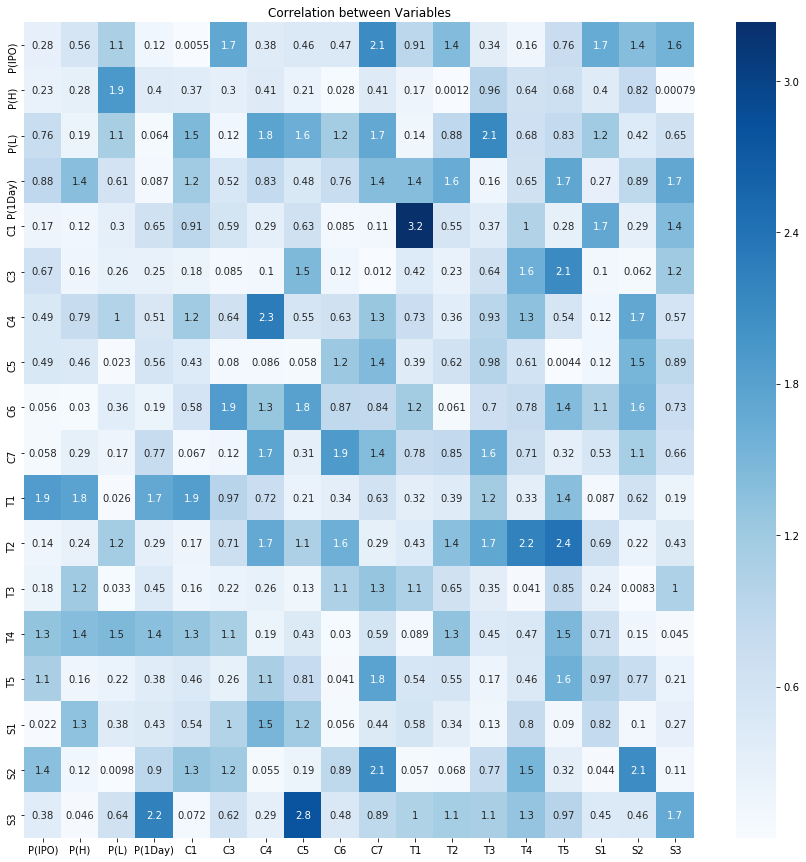

In [126]:
# Correlation between Variables

index= ['P(IPO)', 'P(H)', 'P(L)', 'P(1Day)','C1','C3','C4','C5','C6','C7','T1','T2','T3','T4','T5','S1','S2','S3']
cols = ['P(IPO)', 'P(H)', 'P(L)', 'P(1Day)','C1','C3','C4','C5','C6','C7','T1','T2','T3','T4','T5','S1','S2','S3']
df = DataFrame(abs(np.random.randn(18,18)), index=index,  columns=cols)
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df, annot=True, cbar=True, cmap='Blues')
plt.title("Correlation between Variables")
plt.show()

- Use the Heatmap to determine most correlated variables
    - make scatterplots comparing the 2 variables

# Descriptive Statistics

In [54]:
compdata.shape

(682, 29)

In [55]:
compdata.describe(include='all')

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,S1,S2,S3,T3_,T4_,T5_,S1_,S2_,S3_,Imputed_C2
count,682,682,674,677.000000,672.000000,672.000000,660.000000,660.000000,660.000000,646.000000,...,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,660.000000
unique,682,682,201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,MHGC,"Ubiquiti Networks, Inc.",2834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,13.837666,15.481190,13.515045,25.934766,149.728788,0.859091,1.788904,...,68.421439,120.104258,144.759178,inf,62.806072,inf,inf,inf,inf,0.859091
std,NaN,NaN,NaN,6.053731,6.653429,5.835646,73.234948,152.817467,0.348192,162.666532,...,39.096525,84.828959,69.276285,NaN,8.359313,NaN,NaN,NaN,NaN,0.348192
min,NaN,NaN,NaN,3.000000,0.000000,3.000000,0.000000,10.000000,0.000000,-786.239000,...,-1.000000,20.000000,26.000000,0.000000,0.000000,-0.008908,-0.009290,0.215243,0.512517,0.000000
25%,NaN,NaN,NaN,10.000000,12.500000,11.000000,11.000000,85.000000,1.000000,-0.852500,...,45.000000,73.000000,100.000000,88.347155,57.976654,4.726085,0.414880,0.703139,0.956819,1.000000
50%,NaN,NaN,NaN,13.500000,15.000000,13.000000,14.845000,107.000000,1.000000,0.010000,...,60.000000,100.000000,134.000000,89.722518,62.903226,5.188594,0.505798,0.859454,1.130187,1.000000
75%,NaN,NaN,NaN,17.000000,17.000000,15.000000,20.485000,155.250000,1.000000,0.470000,...,85.000000,142.000000,173.000000,90.975152,67.486339,5.645496,0.625892,1.054145,1.289134,1.000000


In [56]:
compdata.median()

P(IPO)        1.350000e+01
P(H)          1.500000e+01
P(L)          1.300000e+01
P(1Day)       1.484500e+01
C1            1.070000e+02
C2            1.000000e+00
C3            1.000000e-02
C4            9.124591e-03
C5            2.740018e+07
C6            7.398704e+06
C7            1.038330e+02
T1            4.440000e+02
T2            1.204500e+04
T3            1.078500e+04
T4            2.790000e+02
T5            6.240000e+02
S1            6.000000e+01
S2            1.000000e+02
S3            1.340000e+02
T3_           8.972252e+01
T4_           6.290323e+01
T5_           5.188594e+00
S1_           5.057982e-01
S2_           8.594540e-01
S3_           1.130187e+00
Imputed_C2    1.000000e+00
dtype: float64

# Outliers:

In [57]:
# Determine if there are any outliers in the data that will alter the results
# Use box plots for all the variables to visualize the outliers 
# Standardize first!

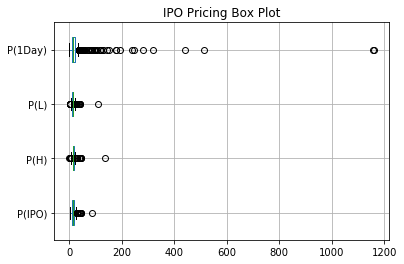

In [58]:
# All in dollars

compdata.boxplot(column=['P(IPO)','P(H)','P(L)','P(1Day)'], vert=False)
plt.title('IPO Pricing Box Plot')
plt.show()

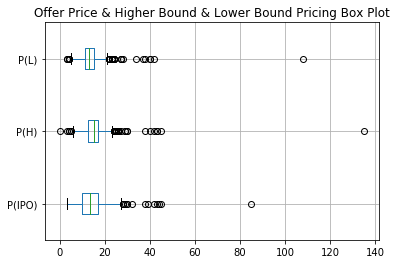

In [59]:
# Take P(1Day) out to create more even results

compdata.boxplot(column=['P(IPO)','P(H)','P(L)'], vert=False)
plt.title('Offer Price & Higher Bound & Lower Bound Pricing Box Plot')
plt.show()

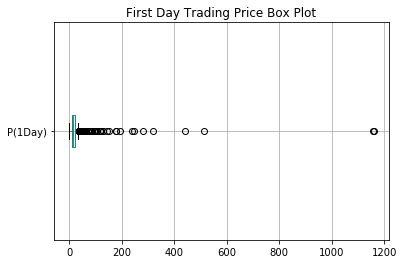

In [60]:
compdata.boxplot(column='P(1Day)', vert=False)
plt.title('First Day Trading Price Box Plot')
plt.show()

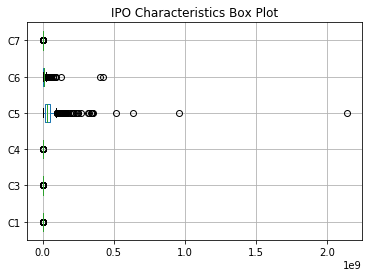

In [61]:
compdata.boxplot(column=['C1','C3','C4','C5','C6','C7'],vert=False)
plt.title('IPO Characteristics Box Plot')
plt.show()

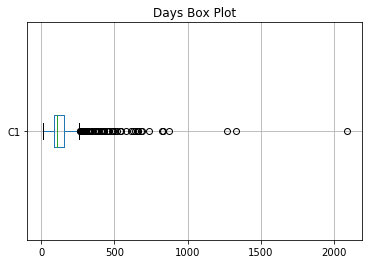

In [62]:
# In number of days

compdata.boxplot(column=['C1'],vert=False)
plt.title('Days Box Plot')
plt.show()

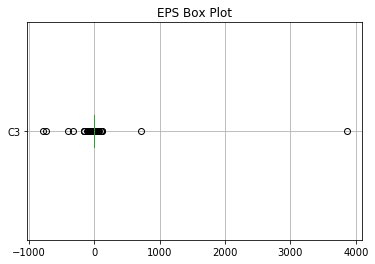

In [63]:
# Seperate the variables into that fit better with one another into their own box plot
    # Help visualization
# EPS is in dollars 

compdata.boxplot(column=['C3'],vert=False)
plt.title('EPS Box Plot')
plt.show()

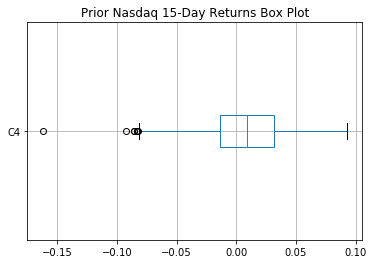

In [64]:
compdata.boxplot(column='C4',vert=False)
plt.title('Prior Nasdaq 15-Day Returns Box Plot')
plt.show()

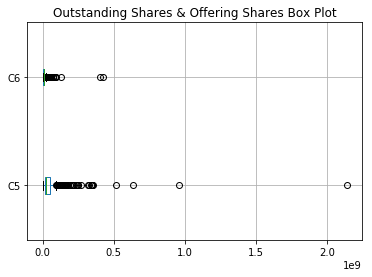

In [65]:
# Both in "number of" 

compdata.boxplot(column=['C5','C6'],vert=False)
plt.title('Outstanding Shares & Offering Shares Box Plot')
plt.show()

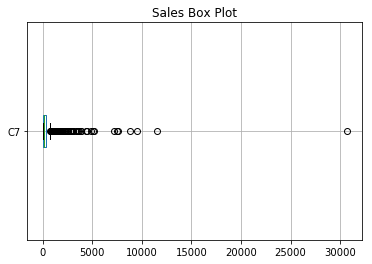

In [66]:
# in millions of dollars

compdata.boxplot(column='C7',vert=False)
plt.title('Sales Box Plot')
plt.show()

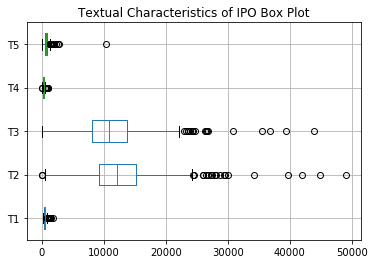

In [81]:
compdata.boxplot(column=['T1','T2','T3','T4','T5'],vert=False)
plt.title('Textual Characteristics of IPO Box Plot')
plt.show()

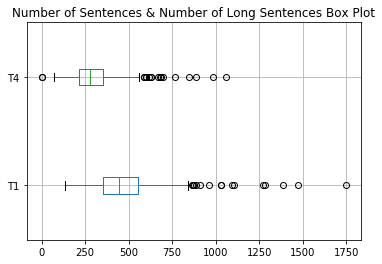

In [82]:
compdata.boxplot(column=['T1','T4'],vert=False)
plt.title('Number of Sentences & Number of Long Sentences Box Plot')
plt.show()

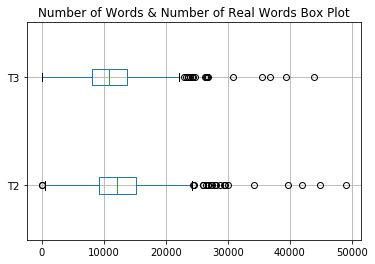

In [83]:
compdata.boxplot(column=['T2','T3'],vert=False)
plt.title('Number of Words & Number of Real Words Box Plot')
plt.show()

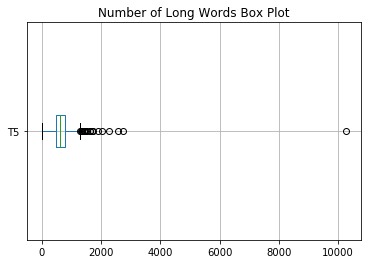

In [84]:
compdata.boxplot(column='T5',vert=False)
plt.title('Number of Long Words Box Plot')
plt.show()

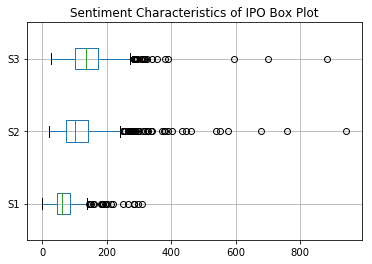

In [85]:
compdata.boxplot(column=['S1','S2','S3'],vert=False)
plt.title('Sentiment Characteristics of IPO Box Plot')
plt.show()

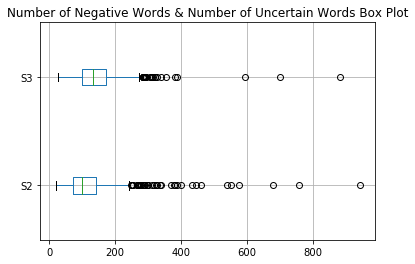

In [86]:
compdata.boxplot(column=['S2','S3'],vert=False)
plt.title('Number of Negative Words & Number of Uncertain Words Box Plot')
plt.show()

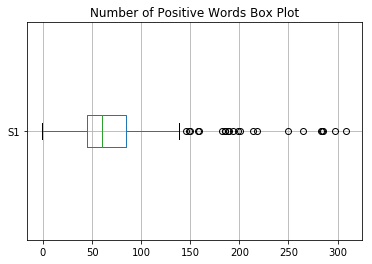

In [87]:
compdata.boxplot(column='S1',vert=False)
plt.title('Number of Positive Words Box Plot')
plt.show()

It is obvious that there are outliers in the dataset that will offset the results. 
To remove this data we will use the interquartile range to determine the upper and lower bound limits and any data outside the limit will be converted to either the lower or upper bound number.

In [88]:
Q1 = compdata['P(IPO)'].quantile(0.25)
Q3 = compdata['P(IPO)'].quantile(0.75)
IQR = Q3 - Q1
LowerBound = Q1 - (1.5 * IQR)
UpperBound = Q3 + (1.5 * IQR)

# compdata[((compdata['P(IPO)'] < LowerBound) |(compdata['P(IPO)'] > UpperBound))]

In [89]:
iqrdata = compdata_int.describe()
iqrdata

,P(IPO),P(H),P(L),P(1Day),C1,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
count,677.000000,672.000000,672.000000,660.000000,660.000000,646.000000,660.000000,6.760000e+02,6.760000e+02,610.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000
mean,13.837666,15.481190,13.515045,25.934766,149.728788,1.788904,0.007282,4.935776e+07,1.241519e+07,500.459962,465.634361,12758.606461,11395.844347,294.353891,679.220264,68.421439,120.104258,144.759178
std,6.053731,6.653429,5.835646,73.234948,152.817467,162.666532,0.033318,1.043764e+08,2.512855e+07,1648.337634,175.741647,5449.644597,4839.670179,121.532637,472.914323,39.096525,84.828959,69.276285
min,3.000000,0.000000,3.000000,0.000000,10.000000,-786.239000,-0.162352,3.693227e+06,5.250000e+05,0.074000,132.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,20.000000,26.000000
25%,10.000000,12.500000,11.000000,11.000000,85.000000,-0.852500,-0.013927,1.871417e+07,5.000000e+06,37.245750,351.000000,9195.000000,8162.000000,213.000000,462.000000,45.000000,73.000000,100.000000
50%,13.500000,15.000000,13.000000,14.845000,107.000000,0.010000,0.009125,2.740018e+07,7.398704e+06,103.833000,444.000000,12045.000000,10785.000000,279.000000,624.000000,60.000000,100.000000,134.000000
75%,17.000000,17.000000,15.000000,20.485000,155.250000,0.470000,0.031571,4.980786e+07,1.200000e+07,331.138000,551.000000,15241.000000,13760.000000,354.000000,795.000000,85.000000,142.000000,173.000000
max,85.000000,135.000000,108.000000,1159.200562,2087.000000,3864.500000,0.092896,2.138085e+09,4.212336e+08,30683.000000,1750.000000,49056.000000,43952.000000,1058.000000,10277.000000,309.000000,944.000000,883.000000


In [90]:
# This dataframe has rows for the IQR Upper Bound and Lower Bound numbers for each variable

iqrdata.loc['IQR'] = (iqrdata.loc['75%']-iqrdata.loc['25%'])
iqrdata.loc['UpperRange'] = (iqrdata.loc['75%']+(1.5*iqrdata.loc['IQR']))
iqrdata.loc['LowerRange'] = (iqrdata.loc['25%']-(1.5*iqrdata.loc['IQR']))
iqrdata

,P(IPO),P(H),P(L),P(1Day),C1,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
count,677.000000,672.000000,672.000000,660.000000,660.000000,646.000000,660.000000,6.760000e+02,6.760000e+02,610.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000
mean,13.837666,15.481190,13.515045,25.934766,149.728788,1.788904,0.007282,4.935776e+07,1.241519e+07,500.459962,465.634361,12758.606461,11395.844347,294.353891,679.220264,68.421439,120.104258,144.759178
std,6.053731,6.653429,5.835646,73.234948,152.817467,162.666532,0.033318,1.043764e+08,2.512855e+07,1648.337634,175.741647,5449.644597,4839.670179,121.532637,472.914323,39.096525,84.828959,69.276285
min,3.000000,0.000000,3.000000,0.000000,10.000000,-786.239000,-0.162352,3.693227e+06,5.250000e+05,0.074000,132.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,20.000000,26.000000
25%,10.000000,12.500000,11.000000,11.000000,85.000000,-0.852500,-0.013927,1.871417e+07,5.000000e+06,37.245750,351.000000,9195.000000,8162.000000,213.000000,462.000000,45.000000,73.000000,100.000000
50%,13.500000,15.000000,13.000000,14.845000,107.000000,0.010000,0.009125,2.740018e+07,7.398704e+06,103.833000,444.000000,12045.000000,10785.000000,279.000000,624.000000,60.000000,100.000000,134.000000
75%,17.000000,17.000000,15.000000,20.485000,155.250000,0.470000,0.031571,4.980786e+07,1.200000e+07,331.138000,551.000000,15241.000000,13760.000000,354.000000,795.000000,85.000000,142.000000,173.000000
max,85.000000,135.000000,108.000000,1159.200562,2087.000000,3864.500000,0.092896,2.138085e+09,4.212336e+08,30683.000000,1750.000000,49056.000000,43952.000000,1058.000000,10277.000000,309.000000,944.000000,883.000000
IQR,7.000000,4.500000,4.000000,9.485000,70.250000,1.322500,0.045498,3.109368e+07,6.999999e+06,293.892250,200.000000,6046.000000,5598.000000,141.000000,333.000000,40.000000,69.000000,73.000000
UpperRange,27.500000,23.750000,21.000000,34.712499,260.625000,2.453750,0.099817,9.644838e+07,2.250000e+07,771.976375,851.000000,24310.000000,22157.000000,565.500000,1294.500000,145.000000,245.500000,282.500000


- We need to connect the upper bound and lower bound limits to all the variable results in the original dataframe
- Check to make sure the dataframe shows these changes in variables
- Create a new dataframe of the results excluding the outliers

# Meta Data:
__Variable Identification__

- Do we need metadata?
- Will this help create the heatmap and correlations?

__**Not Finished__

data = []
for v in compdata.columns:
    # Defining the role
    if v == 'I1':
        role = 'ticker'
    elif v == 'I2':
        role = 'company_name'
    elif v == 'I3':
        role = 'standard_industry_classifier'
    else:
        role = 'input'
         
    # Defining the level
    if v == ('C2','Y1','Y2','C3'):
        level = 'binary'
    elif v == 'I2':
        role = 'company_name'
    elif v == 'I3':
        role = 'standard_industry_classifier'
    else:
        role = 'input'
    
    # Defining the data type 
    
    # Create a Dict that contains all the metadata for the variable

    
meta = pd.DataFrame(data, columns=[])
meta.set_index('varname', inplace=True)

# Variable Imputation:

- Should this be done before the IQR?

In [91]:
# Target Variable Calculation

compdata['P(mid)'] = ((compdata['P(H)']+compdata['P(L)'])/2)

def p(row):
    if row['P(IPO)'] < row['P(mid)']:
        val = 1
    else:
        val = 0
    return val

def q(row):
    if row['P(1Day)'] > row['P(IPO)']:
        val = 1
    else:
        val = 0
    return val

In [92]:
# Control Variable Calculation

def r(row):
    if row['C3'] >= 0:
        val = 1
    else:
        val = 0
    return val

def s(row):
    if row['P(IPO)'] > row['P(mid)']:
        val = (row['P(IPO)'] - row['P(mid)'])/row['P(mid)']*100
    else:
        val = 0
    return val

compdata['C3_'] = compdata.apply(r, axis=1)
compdata['C5_'] = compdata['C5']/compdata['C6'] 
compdata['C6_'] = compdata.apply(s, axis=1)

In [93]:
# Make sure all values were added
compdata.head()

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,T4_,T5_,S1_,S2_,S3_,Imputed_C2,P(mid),C3_,C5_,C6_
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,64.042553,5.424955,0.487460,0.919884,1.092853,1.0,9.0,1,3.864345,11.111111
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,64.475348,5.139501,0.325808,1.110499,1.087555,0.0,9.0,0,12.028832,0.000000
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,63.681592,6.176359,1.159255,0.627138,1.140251,1.0,13.0,0,3.369134,0.000000
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,53.963415,6.162974,0.968640,0.714372,1.331880,1.0,15.0,0,3.299697,0.000000
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,58.741259,4.855024,0.451787,1.004720,1.126096,1.0,20.0,1,3.726269,5.000000
